### analiza vectorizerow dla Logistic Regression (defaultowy)

In [1]:
%load_ext autoreload
%autoreload 2
random_state = 42
import sys
sys.path.append("..")
import scripts.data_utils as dutils

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
data = pd.read_csv('../data_for_modeling/dataset_sample_30_percent.csv')
data.head()

,text,fake
0,"A video showing a smokenado, a tornado-shaped ...",0
1,Photograph shows a breast rash caused by South...,1
2,Pfizer CEO is still not vaccinated,1
3,Steven Seagal receives Russian citizenship on ...,0
4,Mitt Romney drove to Canada with the family do...,0


In [48]:
min_df= range(1, 10, 2)
max_df= [0.5, 0.6, 0.7, 0.8, 0.9]

## ngrams (1, 2)

### rozne min_df

zbadajmy jak wygladaja metryki dla roznych min_df 

min_df: 1, max_df: 0.9, accuracy: 0.5893545898688609, precision: 0.5966532025389498, recall: 0.5351966873706004, f1: 0.564256480218281
min_df: 3, max_df: 0.9, accuracy: 0.5893545898688609, precision: 0.5966532025389498, recall: 0.5351966873706004, f1: 0.564256480218281
min_df: 5, max_df: 0.9, accuracy: 0.5890974543584468, precision: 0.5961981566820277, recall: 0.5357142857142857, f1: 0.564340239912759
min_df: 7, max_df: 0.9, accuracy: 0.5890974543584468, precision: 0.5964203233256351, recall: 0.5346790890269151, f1: 0.5638646288209607
min_df: 9, max_df: 0.9, accuracy: 0.5885831833376189, precision: 0.5957324106113033, recall: 0.5346790890269151, f1: 0.563557010365521


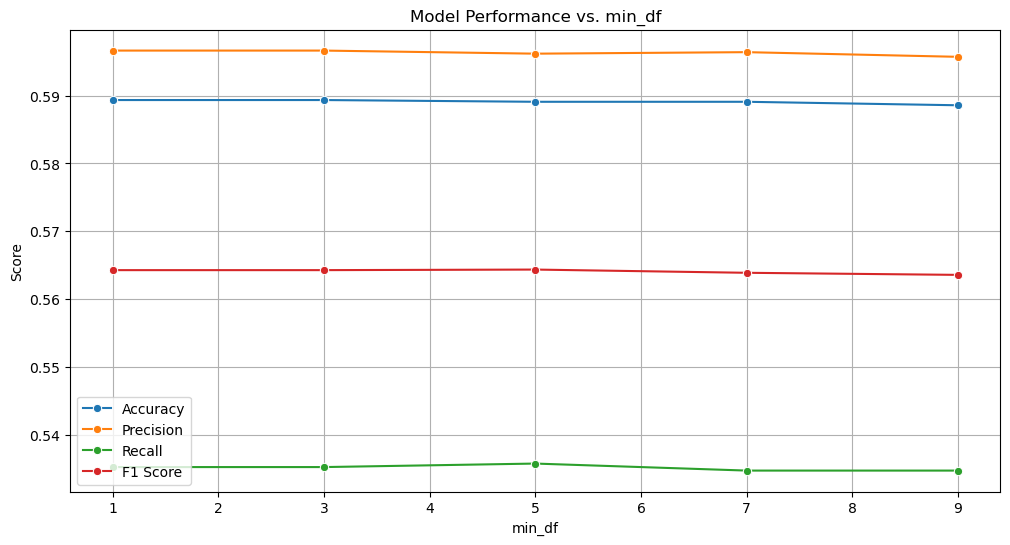

In [49]:
df = pd.DataFrame(columns=['min_df', 'max_df', 'accuracy', 'precision', 'recall', 'f1'])
results_list = []

for min_d in min_df:
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=min_d, max_df=0.9)
    vectorizer.fit(data['text'])
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state)
    lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    lr.fit(X_train_vec, y_train)
    y_pred = lr.predict(X_test_vec)

    current_results = {
        'min_df': min_d,
        'max_df': 0.9,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    results_list.append(current_results)
    print(f"min_df: {min_d}, max_df: 0.9, accuracy: {current_results['accuracy']}, precision: {current_results['precision']}, recall: {current_results['recall']}, f1: {current_results['f1']}")

df = pd.DataFrame(results_list)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='min_df', y='accuracy', marker='o', label='Accuracy')
sns.lineplot(data=df, x='min_df', y='precision', marker='o', label='Precision')
sns.lineplot(data=df, x='min_df', y='recall', marker='o', label='Recall')
sns.lineplot(data=df, x='min_df', y='f1', marker='o', label='F1 Score')
plt.title('Model Performance vs. min_df')
plt.xlabel('min_df')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()



bardzo niewielkie zmiany, cięzko na wykresie rozpoznac. sprawdzmy konkret

In [52]:

metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    row = df[df[metric] == df[metric].max()].iloc[0]
    print(f"Max {metric}: {row[metric]:.3f}, min_df: {row['min_df']}, max_df: {row['max_df']} ")


Max accuracy: 0.589, min_df: 1.0, max_df: 0.9 
Max precision: 0.597, min_df: 1.0, max_df: 0.9 
Max recall: 0.536, min_df: 5.0, max_df: 0.9 
Max f1: 0.564, min_df: 5.0, max_df: 0.9 


### rozne max_df, dla min_df = 1
to samo dla **max_df**, min_df bierzemy "najlepszy" - 1

min_df: 1, max_df: 0.5, accuracy: 0.5934687580354847, precision: 0.6028119507908611, recall: 0.532608695652174, f1: 0.5655399835119538
min_df: 1, max_df: 0.6, accuracy: 0.5944973000771406, precision: 0.6047197640117994, recall: 0.5305383022774327, f1: 0.5652054039150813
min_df: 1, max_df: 0.7, accuracy: 0.5957829776292106, precision: 0.6061320754716981, recall: 0.5320910973084886, f1: 0.5667034178610805
min_df: 1, max_df: 0.8, accuracy: 0.5893545898688609, precision: 0.5966532025389498, recall: 0.5351966873706004, f1: 0.564256480218281
min_df: 1, max_df: 0.9, accuracy: 0.5893545898688609, precision: 0.5966532025389498, recall: 0.5351966873706004, f1: 0.564256480218281


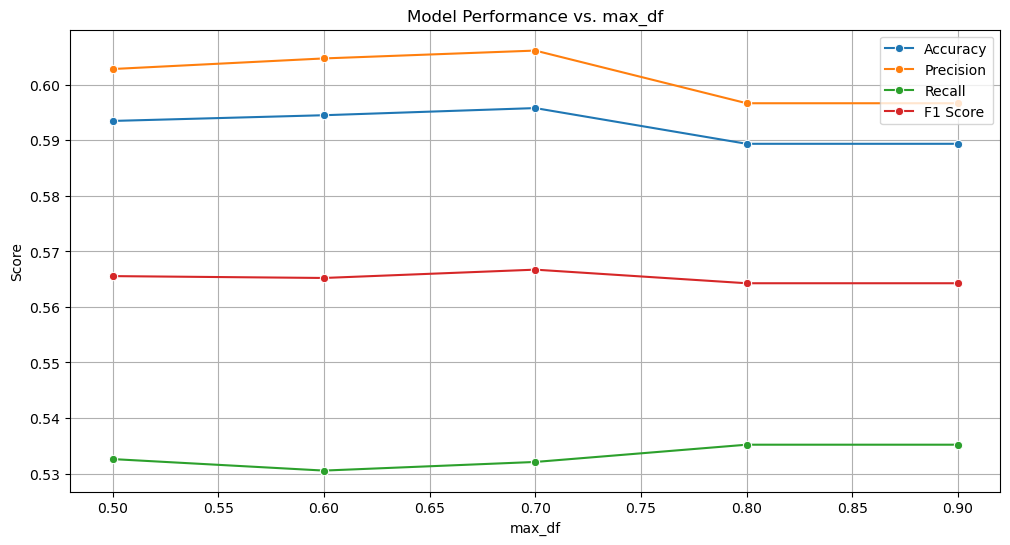

In [70]:
df = pd.DataFrame(columns=['min_df', 'max_df', 'accuracy', 'precision', 'recall', 'f1'])
results_list = []
min_df = 1

for max_d in max_df:
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=min_df, max_df=max_d)
    vectorizer.fit(data['text'])
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state)
    lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    lr.fit(X_train_vec, y_train)
    y_pred = lr.predict(X_test_vec)

    current_results = {
        'min_df': min_df,
        'max_df': max_d,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    results_list.append(current_results)
    print(f"min_df: {min_df}, max_df: {max_d}, accuracy: {current_results['accuracy']}, precision: {current_results['precision']}, recall: {current_results['recall']}, f1: {current_results['f1']}")

df = pd.DataFrame(results_list)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='max_df', y='accuracy', marker='o', label='Accuracy')
sns.lineplot(data=df, x='max_df', y='precision', marker='o', label='Precision')
sns.lineplot(data=df, x='max_df', y='recall', marker='o', label='Recall')
sns.lineplot(data=df, x='max_df', y='f1', marker='o', label='F1 Score')
plt.title('Model Performance vs. max_df')
plt.xlabel('max_df')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [57]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    row = df[df[metric] == df[metric].max()].iloc[0]
    print(f"Max {metric}: {row[metric]:.3f}, max_df: {row['max_df']}, min_df: {row['min_df']} ")

Max accuracy: 0.596, max_df: 0.7, min_df: 1.0 
Max precision: 0.606, max_df: 0.7, min_df: 1.0 
Max recall: 0.535, max_df: 0.8, min_df: 1.0 
Max f1: 0.567, max_df: 0.7, min_df: 1.0 


### rozne **max_df**, min_df = 5
i dla min_df = 5

min_df: 5, max_df: 0.5, accuracy: 0.5934687580354847, precision: 0.6028119507908611, recall: 0.532608695652174, f1: 0.5655399835119538
min_df: 5, max_df: 0.6, accuracy: 0.5947544355875546, precision: 0.6050767414403778, recall: 0.5305383022774327, f1: 0.5653612796469939
min_df: 5, max_df: 0.7, accuracy: 0.5968115196708665, precision: 0.6073113207547169, recall: 0.5331262939958592, f1: 0.5678059536934951
min_df: 5, max_df: 0.8, accuracy: 0.5890974543584468, precision: 0.5961981566820277, recall: 0.5357142857142857, f1: 0.564340239912759
min_df: 5, max_df: 0.9, accuracy: 0.5890974543584468, precision: 0.5961981566820277, recall: 0.5357142857142857, f1: 0.564340239912759


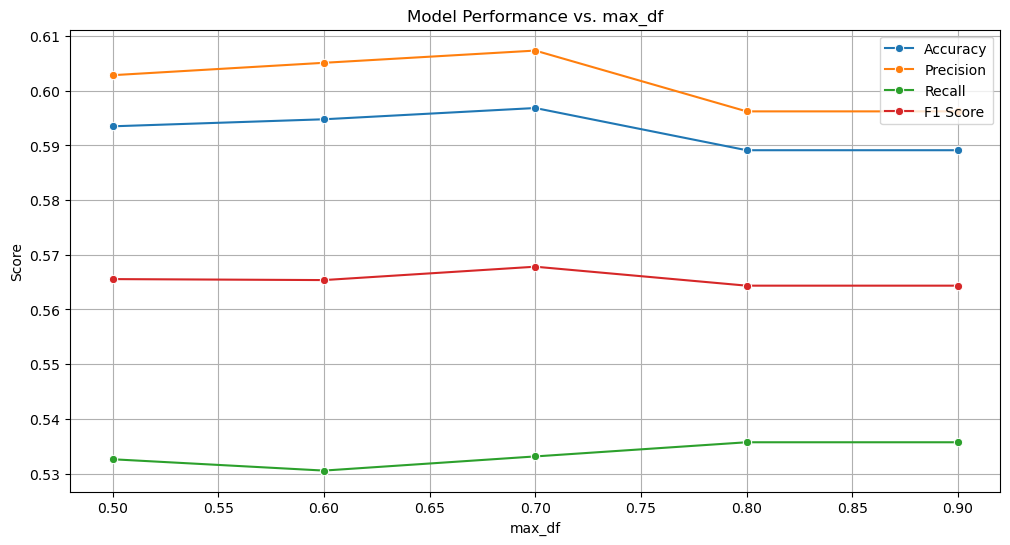

In [58]:
df = pd.DataFrame(columns=['min_df', 'max_df', 'accuracy', 'precision', 'recall', 'f1'])
results_list = []
min_df = 5

for max_d in max_df:
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=min_df, max_df=max_d)
    vectorizer.fit(data['text'])
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state)
    lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    lr.fit(X_train_vec, y_train)
    y_pred = lr.predict(X_test_vec)

    current_results = {
        'min_df': min_df,
        'max_df': max_d,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    results_list.append(current_results)
    print(f"min_df: {min_df}, max_df: {max_d}, accuracy: {current_results['accuracy']}, precision: {current_results['precision']}, recall: {current_results['recall']}, f1: {current_results['f1']}")

df = pd.DataFrame(results_list)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='max_df', y='accuracy', marker='o', label='Accuracy')
sns.lineplot(data=df, x='max_df', y='precision', marker='o', label='Precision')
sns.lineplot(data=df, x='max_df', y='recall', marker='o', label='Recall')
sns.lineplot(data=df, x='max_df', y='f1', marker='o', label='F1 Score')
plt.title('Model Performance vs. max_df')
plt.xlabel('max_df')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

In [59]:
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    row = df[df[metric] == df[metric].max()].iloc[0]
    print(f"Max {metric}: {row[metric]:.3f}, max_df: {row['max_df']}, min_df: {row['min_df']} ")

Max accuracy: 0.597, max_df: 0.7, min_df: 5.0 
Max precision: 0.607, max_df: 0.7, min_df: 5.0 
Max recall: 0.536, max_df: 0.8, min_df: 5.0 
Max f1: 0.568, max_df: 0.7, min_df: 5.0 


## ngrams (1, 3)

to samo dla ngrams (1,3)

In [67]:
min_df= range(1, 10, 2)
max_df= [0.5, 0.6, 0.7, 0.8, 0.9]

### rozne min_df

min_df: 1, max_df: 0.9, accuracy: 0.5939830290563127, precision: 0.6029154518950437, recall: 0.5351966873706004, f1: 0.5670414038936112
min_df: 3, max_df: 0.9, accuracy: 0.5944973000771406, precision: 0.6036193812025686, recall: 0.5351966873706004, f1: 0.5673525377229081
min_df: 5, max_df: 0.9, accuracy: 0.5942401645667267, precision: 0.603267211201867, recall: 0.5351966873706004, f1: 0.5671969281404279
min_df: 7, max_df: 0.9, accuracy: 0.5952687066083826, precision: 0.6045560747663551, recall: 0.5357142857142857, f1: 0.5680570801317234
min_df: 9, max_df: 0.9, accuracy: 0.5950115710979687, precision: 0.6040816326530613, recall: 0.5362318840579711, f1: 0.5681381957773513


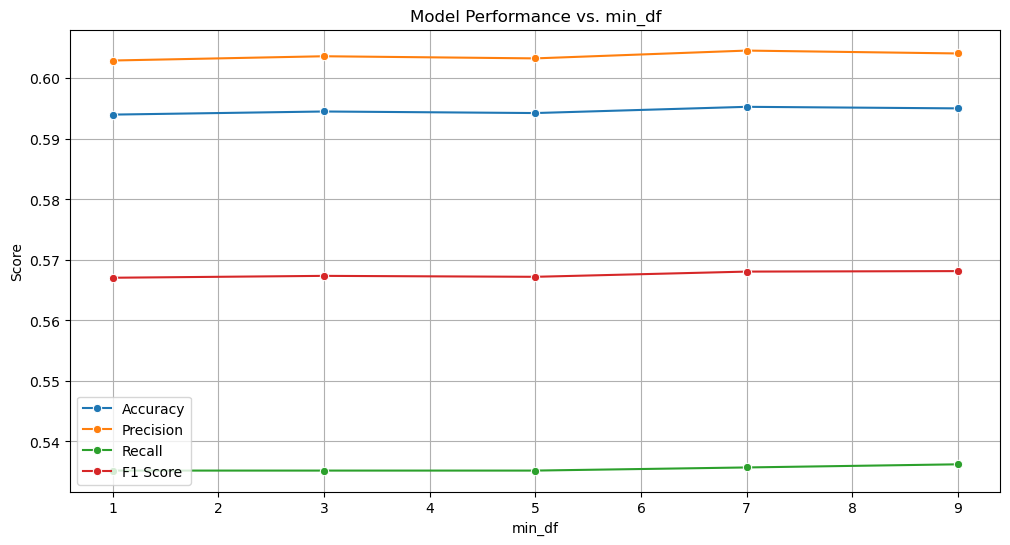

Max accuracy: 0.595, min_df: 7.0, max_df: 0.9 
Max precision: 0.605, min_df: 7.0, max_df: 0.9 
Max recall: 0.536, min_df: 9.0, max_df: 0.9 
Max f1: 0.568, min_df: 9.0, max_df: 0.9 


In [69]:
df = pd.DataFrame(columns=['min_df', 'max_df', 'accuracy', 'precision', 'recall', 'f1'])
results_list = []

for min_d in min_df:
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=min_d, max_df=0.9)
    vectorizer.fit(data['text'])
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state)
    lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    lr.fit(X_train_vec, y_train)
    y_pred = lr.predict(X_test_vec)

    current_results = {
        'min_df': min_d,
        'max_df': 0.9,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    results_list.append(current_results)
    print(f"min_df: {min_d}, max_df: 0.9, accuracy: {current_results['accuracy']}, precision: {current_results['precision']}, recall: {current_results['recall']}, f1: {current_results['f1']}")

df = pd.DataFrame(results_list)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='min_df', y='accuracy', marker='o', label='Accuracy')
sns.lineplot(data=df, x='min_df', y='precision', marker='o', label='Precision')
sns.lineplot(data=df, x='min_df', y='recall', marker='o', label='Recall')
sns.lineplot(data=df, x='min_df', y='f1', marker='o', label='F1 Score')
plt.title('Model Performance vs. min_df')
plt.xlabel('min_df')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    row = df[df[metric] == df[metric].max()].iloc[0]
    print(f"Max {metric}: {row[metric]:.3f}, min_df: {row['min_df']}, max_df: {row['max_df']} ")

### rozne max_df dla min_df = 7

min_df: 7, max_df: 0.5, accuracy: 0.5970686551812805, precision: 0.6079243051448847, recall: 0.5320910973084886, f1: 0.5674855092464808
min_df: 7, max_df: 0.6, accuracy: 0.5970686551812805, precision: 0.6079243051448847, recall: 0.5320910973084886, f1: 0.5674855092464808
min_df: 7, max_df: 0.7, accuracy: 0.5986114682437644, precision: 0.609181871689229, recall: 0.5357142857142857, f1: 0.5700908840539797
min_df: 7, max_df: 0.8, accuracy: 0.5952687066083826, precision: 0.6045560747663551, recall: 0.5357142857142857, f1: 0.5680570801317234
min_df: 7, max_df: 0.9, accuracy: 0.5952687066083826, precision: 0.6045560747663551, recall: 0.5357142857142857, f1: 0.5680570801317234


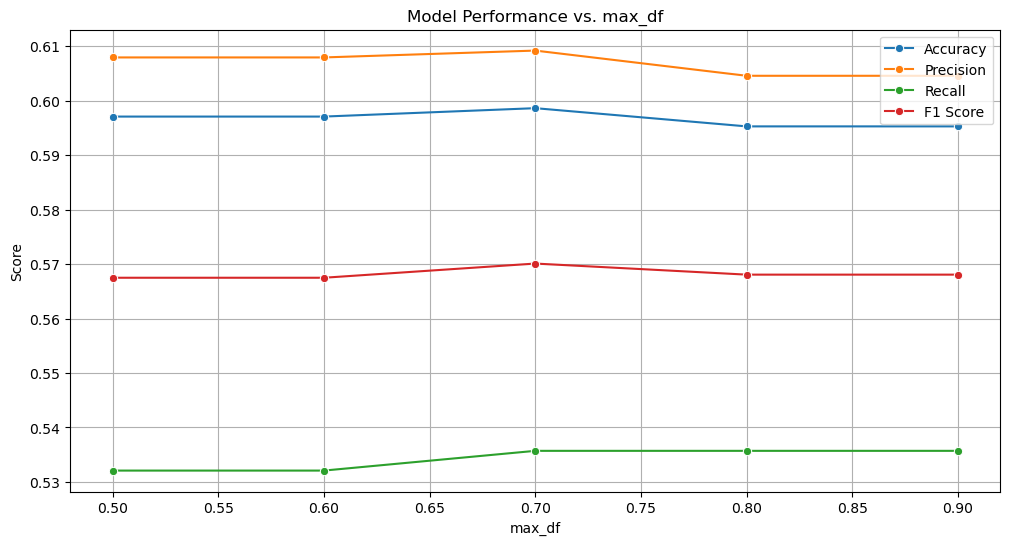

Max accuracy: 0.599, min_df: 7.0, max_df: 0.7 
Max precision: 0.609, min_df: 7.0, max_df: 0.7 
Max recall: 0.536, min_df: 7.0, max_df: 0.7 
Max f1: 0.570, min_df: 7.0, max_df: 0.7 


In [72]:
df = pd.DataFrame(columns=['min_df', 'max_df', 'accuracy', 'precision', 'recall', 'f1'])
results_list = []
min_df = 7

for max_d in max_df:
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=min_df, max_df=max_d)
    vectorizer.fit(data['text'])
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['fake'], test_size=0.2, random_state=random_state)
    lr = LogisticRegression(random_state=random_state, penalty='l2', C=0.1)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    lr.fit(X_train_vec, y_train)
    y_pred = lr.predict(X_test_vec)

    current_results = {
        'min_df': min_df,
        'max_df': max_d,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    results_list.append(current_results)
    print(f"min_df: {min_df}, max_df: {max_d}, accuracy: {current_results['accuracy']}, precision: {current_results['precision']}, recall: {current_results['recall']}, f1: {current_results['f1']}")

df = pd.DataFrame(results_list)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='max_df', y='accuracy', marker='o', label='Accuracy')
sns.lineplot(data=df, x='max_df', y='precision', marker='o', label='Precision')
sns.lineplot(data=df, x='max_df', y='recall', marker='o', label='Recall')
sns.lineplot(data=df, x='max_df', y='f1', marker='o', label='F1 Score')
plt.title('Model Performance vs. max_df')
plt.xlabel('max_df')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    row = df[df[metric] == df[metric].max()].iloc[0]
    print(f"Max {metric}: {row[metric]:.3f}, min_df: {row['min_df']}, max_df: {row['max_df']} ")

## Ostatecznie najlepszy vectorizer to 

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, min_df=7, max_df=0.7)